In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir('/Users/ushnamalik/Downloads/project-music')
print(os.getcwd())  # Verify the directory has changed



FileNotFoundError: [Errno 2] No such file or directory: '/Users/ushnamalik/Downloads/project-music'

In [13]:
import pandas as pd
df = pd.read_csv('dataset.csv')
print(df.head()) 


                                             comment   random     75%  \
0                                     It was awesome   Artist   Music   
1                               Supper songs brother    Music  Artist   
2                                     love you talha  useless  Artist   
3  this is not a song . this is some thing unique...   Artist   Music   
4                                         speechless    Music   Music   

       25%      50%      10%       5% individual   label  
0  useless  useless  useless  useless      Music   Music  
1  useless   Artist    Music    Music      Music   Music  
2   Artist   Artist   Artist  useless     Artist  Artist  
3    Music    Music    Music    Music      Music   Music  
4  useless  useless  useless  useless      Music   Music  


In [14]:
def get_match_count(df,label, label2):
    count = 0
    for i in range(0, len(df)):
        if df[label][i] == df[label2][i]:
            count += 1

    return count

total = len(df)
match_random = get_match_count(df,'random', 'label')
match_individual = get_match_count(df,'individual', 'label')
match_75 = get_match_count(df,'75%', 'label')
match_50 = get_match_count(df,'50%', 'label')
match_25 = get_match_count(df,'25%', 'label')
match_10 = get_match_count(df,'10%', 'label')
match_5 = get_match_count(df,'5%', 'label')

# print percventages for all 
print(f'Random: {match_random/total*100}%')
print(f'Individual: {match_individual/total*100}%')
print(f'75%: {match_75/total*100}%')
print(f'50%: {match_50/total*100}%')
print(f'25%: {match_25/total*100}%')
print(f'10%: {match_10/total*100}%')
print(f'5%: {match_5/total*100}%')

Random: 33.33333333333333%
Individual: 74.69879518072288%
75%: 73.09236947791165%
50%: 66.66666666666666%
25%: 57.028112449799195%
10%: 51.40562248995983%
5%: 53.01204819277109%


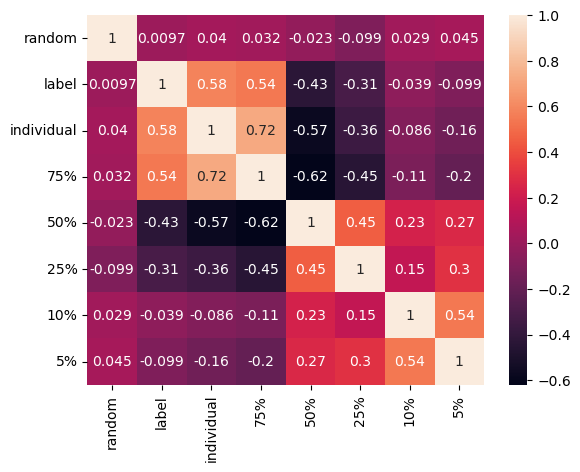

In [15]:
# make corr matrix of match between all labels
corr_matrix = df[['random', 'label','individual', '75%', '50%', '25%', '10%', '5%']].apply(lambda x : x.factorize()[0]).corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


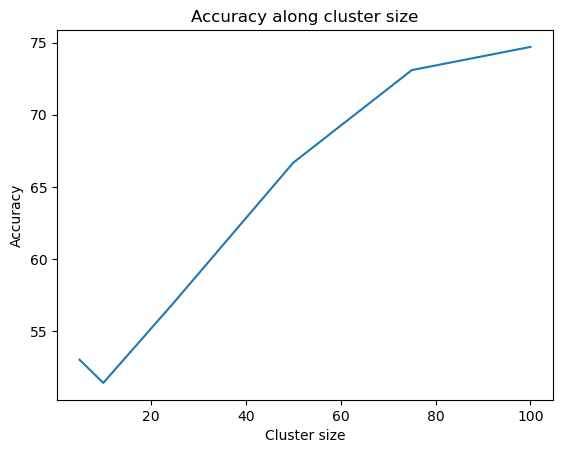

In [16]:
# plot accuracy along cluter size 
cluster_accuracy = [match_5/total*100, match_10/total*100, match_25/total*100, match_50/total*100, match_75/total*100, match_individual/total*100]
cluster_size = [5, 10, 25, 50, 75, 100]
plt.plot(cluster_size, cluster_accuracy)
plt.xlabel('Cluster size')
plt.ylabel('Accuracy')
plt.title('Accuracy along cluster size')
plt.show()

In [18]:
# new_df copy of mergerd df with classes combined into main classes 
new_df = df.copy()

new_df['label'] = new_df['label'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['random'] = new_df['random'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['individual'] = new_df['individual'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['75%'] = new_df['75%'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['50%'] = new_df['50%'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['25%'] = new_df['25%'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['10%'] = new_df['10%'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['5%'] = new_df['5%'].replace({'Ambiguous': 'useless', 'Others': 'useless'})

new_total = len(new_df)
new_match_random = get_match_count(new_df,'random', 'label')
new_match_individual = get_match_count(new_df,'individual', 'label')
new_match_75 = get_match_count(new_df,'75%', 'label')
new_match_50 = get_match_count(new_df,'50%', 'label')
new_match_25 = get_match_count(new_df,'25%', 'label')
new_match_10 = get_match_count(new_df,'10%', 'label')
new_match_5 = get_match_count(new_df,'5%', 'label')

# print percventages for all
print(f'Random: {new_match_random/new_total*100}%')
print(f'Individual: {new_match_individual/new_total*100}%')
print(f'75%: {new_match_75/new_total*100}%')
print(f'50%: {new_match_50/new_total*100}%')
print(f'25%: {new_match_25/new_total*100}%')
print(f'10%: {new_match_10/new_total*100}%')
print(f'5%: {new_match_5/new_total*100}%')

new_df.head()


Random: 33.33333333333333%
Individual: 74.69879518072288%
75%: 73.09236947791165%
50%: 66.66666666666666%
25%: 57.028112449799195%
10%: 51.40562248995983%
5%: 53.01204819277109%


,comment,random,75%,25%,50%,10%,5%,individual,label
0,It was awesome,Artist,Music,useless,useless,useless,useless,Music,Music
1,Supper songs brother,Music,Artist,useless,Artist,Music,Music,Music,Music
2,love you talha,useless,Artist,Artist,Artist,Artist,useless,Artist,Artist
3,this is not a song . this is some thing unique...,Artist,Music,Music,Music,Music,Music,Music,Music
4,speechless,Music,Music,useless,useless,useless,useless,Music,Music


In [19]:
def per_label_accuracy(temp_df, target_col):

    result = {}

    for col in temp_df.columns:
        if col == target_col:
            continue  # Skip the target column itself
        
        label_accuracies = {}
        for label in temp_df[col].unique():
            # Calculate accuracy for this label
            mask = temp_df[col] == label
            accuracy = (temp_df[target_col][mask] == label).mean()
            label_accuracies[label] = accuracy
        
        result[col] = label_accuracies
    
    accuracy_df = pd.DataFrame(result).fillna(0)
    
    return accuracy_df
    



In [20]:
accuracy_df = per_label_accuracy(new_df, 'label')
accuracy_df.tail(3)

,comment,random,75%,25%,50%,10%,5%,individual
Artist,0.0,0.187500,0.657534,0.500000,0.608696,0.339623,0.300000,0.662162
Music,0.0,0.322034,0.808219,0.640625,0.757143,0.600000,0.629630,0.885246
useless,0.0,0.412698,0.728155,0.566929,0.645455,0.534483,0.539062,0.728070


Text(50.722222222222214, 0.5, 'Label')

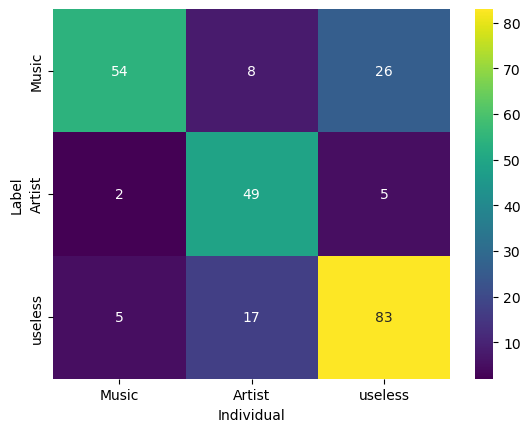

In [21]:
def label_corr(df, col1, col2):

    labels_col1 = df[col1].unique()
    labels_col2 = df[col2].unique()
    
    # Initialize a matrix to hold the counts
    matrix = pd.DataFrame(0, index=labels_col1, columns=labels_col2)
    
    # Count occurrences of each label combination
    for label1 in labels_col1:
        for label2 in labels_col2:
            matrix.loc[label1, label2] = ((df[col1] == label1) & (df[col2] == label2)).sum()
    
    
    return matrix


corr = label_corr(new_df, 'label', 'individual')
# plot as heatmap and label axis use viridis color map
sns.heatmap(corr, cmap='viridis', annot=True)
plt.xlabel('Individual')
plt.ylabel('Label')
# plt.show()
# corr

In [22]:
df

,comment,random,75%,25%,50%,10%,5%,individual,label
0,It was awesome,Artist,Music,useless,useless,useless,useless,Music,Music
1,Supper songs brother,Music,Artist,useless,Artist,Music,Music,Music,Music
2,love you talha,useless,Artist,Artist,Artist,Artist,useless,Artist,Artist
3,this is not a song . this is some thing unique...,Artist,Music,Music,Music,Music,Music,Music,Music
4,speechless,Music,Music,useless,useless,useless,useless,Music,Music
...,...,...,...,...,...,...,...,...,...
244,Bht pyara…️,useless,Music,useless,Music,useless,useless,useless,useless
245,its been one whole year i havent seen you yes ...,useless,useless,useless,useless,useless,Artist,useless,useless
246,Nyc,useless,useless,useless,Music,Artist,useless,useless,Music
247,Most amazing track loved it the moment I heard...,useless,Music,Music,Music,Music,Music,Music,Music


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
cluster_columns = ['random', '75%', '25%', '50%', '10%', '5%', 'individual']
ground_truth = df['label']
accuracy_metrics = {}

for column in cluster_columns:
    overall_accuracy = accuracy_score(ground_truth, df[column])
    classification_metrics = classification_report(ground_truth, df[column], output_dict=True)
    accuracy_metrics[column] = {
        'overall_accuracy': overall_accuracy,
        'classification_metrics': classification_metrics
    }

metrics_summary = pd.DataFrame({
    cluster: {
        'Overall Accuracy': accuracy_metrics[cluster]['overall_accuracy'],
        'Precision (Music)': accuracy_metrics[cluster]['classification_metrics']['Music']['precision'],
        'Recall (Music)': accuracy_metrics[cluster]['classification_metrics']['Music']['recall'],
        'F1-score (Music)': accuracy_metrics[cluster]['classification_metrics']['Music']['f1-score'],
        'Precision (Artist)': accuracy_metrics[cluster]['classification_metrics']['Artist']['precision'],
        'Recall (Artist)': accuracy_metrics[cluster]['classification_metrics']['Artist']['recall'],
        'F1-score (Artist)': accuracy_metrics[cluster]['classification_metrics']['Artist']['f1-score'],
        'Precision (Useless)': accuracy_metrics[cluster]['classification_metrics']['useless']['precision'],
        'Recall (Useless)': accuracy_metrics[cluster]['classification_metrics']['useless']['recall'],
        'F1-score (Useless)': accuracy_metrics[cluster]['classification_metrics']['useless']['f1-score']
    }
    for cluster in cluster_columns
}).T



,Overall Accuracy,Precision (Music),Recall (Music),F1-score (Music),Precision (Artist),Recall (Artist),F1-score (Artist),Precision (Useless),Recall (Useless),F1-score (Useless)
random,0.333333,0.322034,0.215909,0.258503,0.187500,0.214286,0.200000,0.412698,0.495238,0.450216
75%,0.730924,0.808219,0.670455,0.732919,0.657534,0.857143,0.744186,0.728155,0.714286,0.721154
25%,0.570281,0.640625,0.465909,0.539474,0.500000,0.517857,0.508772,0.566929,0.685714,0.620690
50%,0.666667,0.757143,0.602273,0.670886,0.608696,0.750000,0.672000,0.645455,0.676190,0.660465
10%,0.514056,0.600000,0.545455,0.571429,0.339623,0.321429,0.330275,0.534483,0.590476,0.561086
5%,0.530120,0.629630,0.579545,0.603550,0.300000,0.214286,0.250000,0.539062,0.657143,0.592275
individual,0.746988,0.885246,0.613636,0.724832,0.662162,0.875000,0.753846,0.728070,0.790476,0.757991


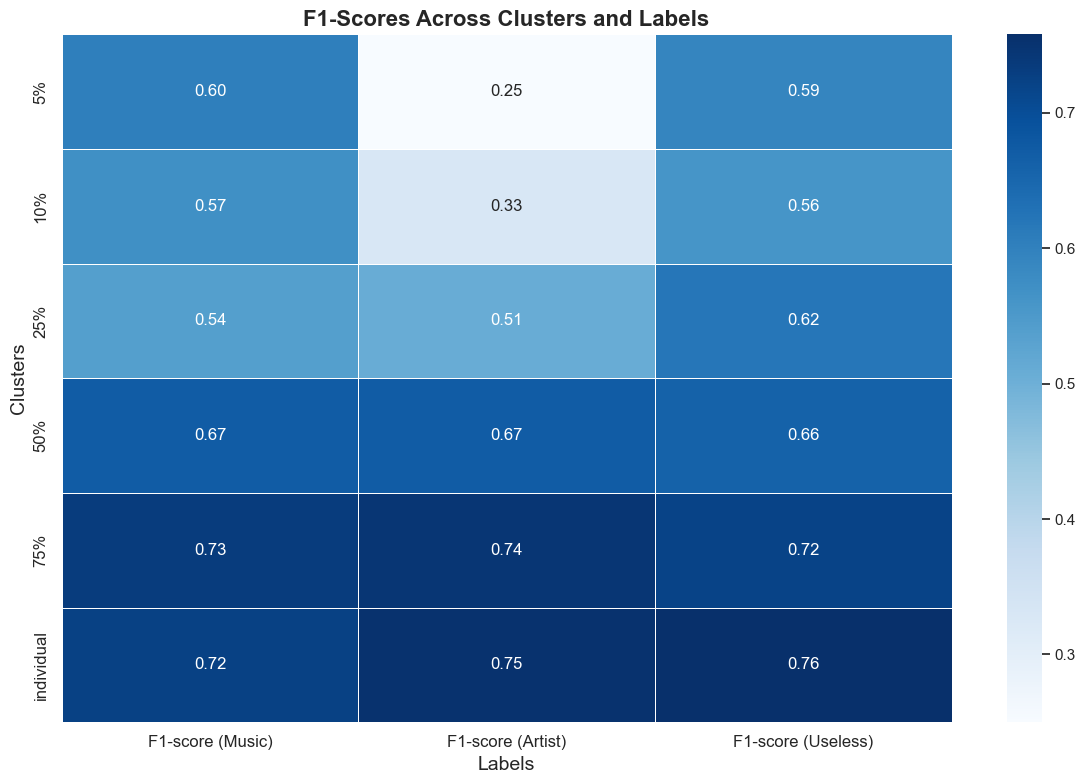

In [87]:
accuracy_df = metrics_summary.copy()
f1_scores = accuracy_df[
    ['F1-score (Music)', 'F1-score (Artist)', 'F1-score (Useless)']
]

plt.figure(figsize=(12, 8))
sns.heatmap(f1_scores, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('F1-Scores Across Clusters and Labels', fontsize=16, fontweight='bold')
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Clusters', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


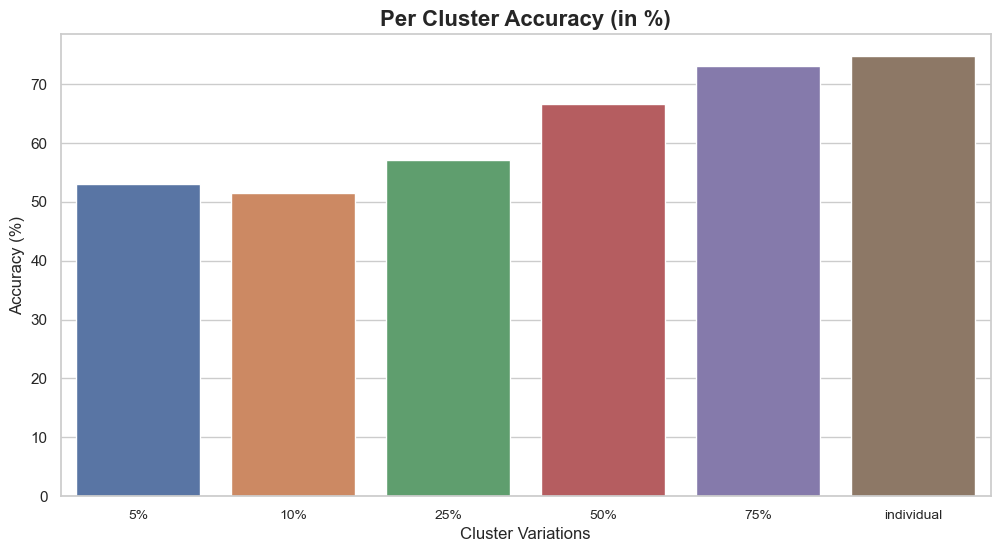

In [78]:
ordered_clusters = ['5%', '10%', '25%', '50%', '75%', 'individual']
metrics_summary['Overall Accuracy (%)'] = metrics_summary['Overall Accuracy'] * 100
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=metrics_summary.index, y=metrics_summary['Overall Accuracy (%)'])
plt.title('Per Cluster Accuracy (in %)', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Cluster Variations', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.show()



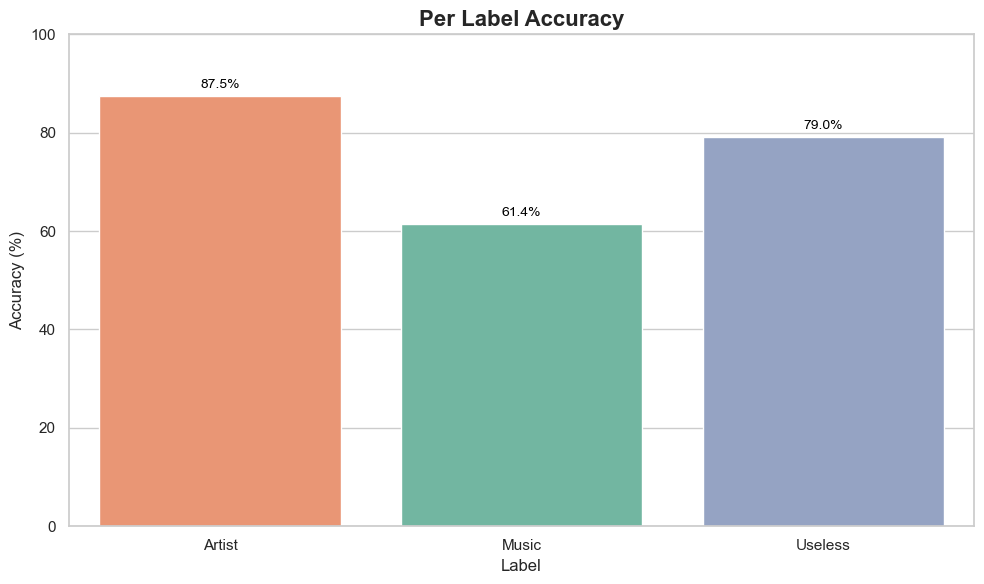

In [73]:
label_overall_accuracy = {}

for label in df['label'].unique():
    total_label = (df['label'] == label).sum()
    correct_label = ((df['label'] == label) & (df['individual'] == df['label'])).sum()
    label_overall_accuracy[label] = (correct_label / total_label) * 100 if total_label > 0 else 0
label_overall_accuracy = {k if k != 'useless' else 'Useless': v for k, v in label_overall_accuracy.items()}
label_accuracy_df = pd.DataFrame.from_dict(label_overall_accuracy, orient='index', columns=['Accuracy (%)'])
label_accuracy_df = label_accuracy_df.reindex(['Artist', 'Music', 'Useless'])

plt.figure(figsize=(10, 6))
sns.barplot(x=label_accuracy_df.index, y=label_accuracy_df['Accuracy (%)'], palette=["#FC8D62", "#66C2A5", "#8DA0CB"])
plt.title('Per Label Accuracy', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.ylim(0, 100) 
for i, value in enumerate(label_accuracy_df['Accuracy (%)']):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()



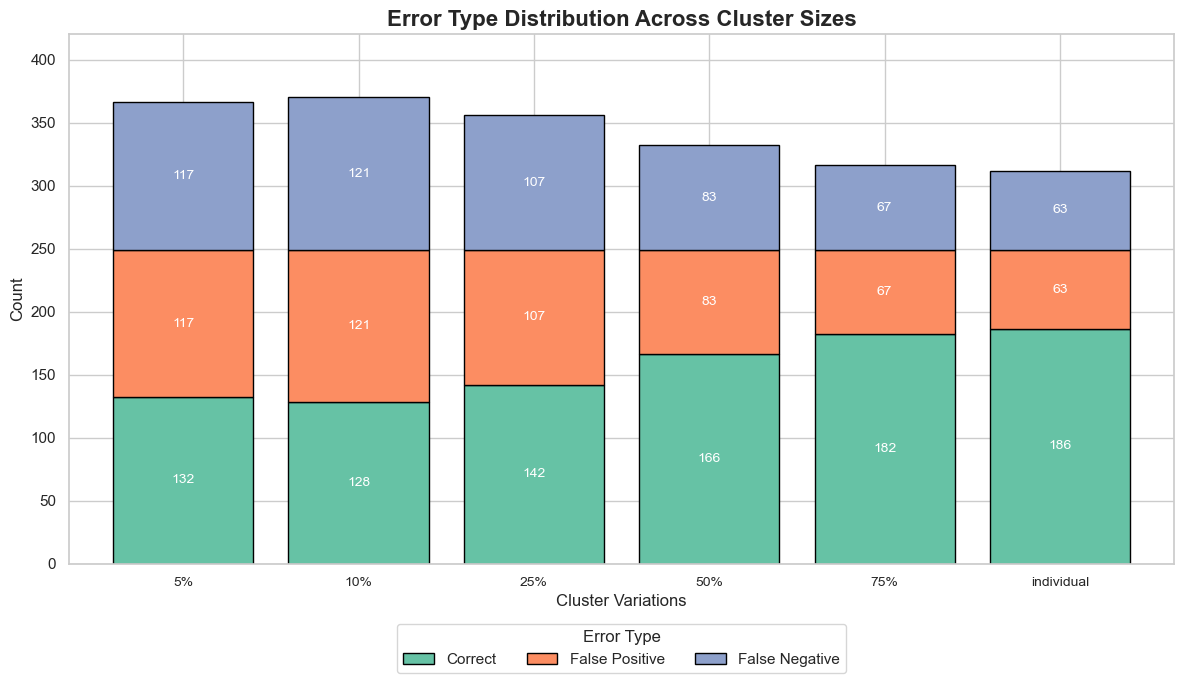

In [86]:
error_stats = pd.DataFrame(index=metrics_summary.index)

for cluster in metrics_summary.index:
    correct = (df[cluster] == df['label']).sum()
    false_positive = ((df[cluster] != df['label']) & (df[cluster] != "Useless")).sum()
    false_negative = ((df[cluster] != df['label']) & (df['label'] != "Useless")).sum()
    error_stats.loc[cluster, 'Correct'] = correct
    error_stats.loc[cluster, 'False Positive'] = false_positive
    error_stats.loc[cluster, 'False Negative'] = false_negative

plt.figure(figsize=(12, 7))
bars = error_stats.plot(
    kind='bar', 
    stacked=True, 
    color=["#66C2A5", "#FC8D62", "#8DA0CB"],  
    edgecolor='black', 
    width=0.8, 
    ax=plt.gca()
)
for i, cluster in enumerate(error_stats.index):
    for j, value in enumerate(error_stats.loc[cluster]):
        plt.text(i, error_stats.loc[cluster].iloc[:j].sum() + value / 2, 
                 int(value), ha='center', va='center', fontsize=10, color="white" if value > 20 else "black")

plt.title('Error Type Distribution Across Cluster Sizes', fontsize=16, fontweight= 'bold')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Cluster Variations', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.ylim(0, error_stats.sum(axis=1).max() + 50)  
plt.legend(
    title="Error Type", 
    loc="upper center", 
    bbox_to_anchor=(0.5, -0.1), 
    ncol=3
)

plt.tight_layout()
plt.show()




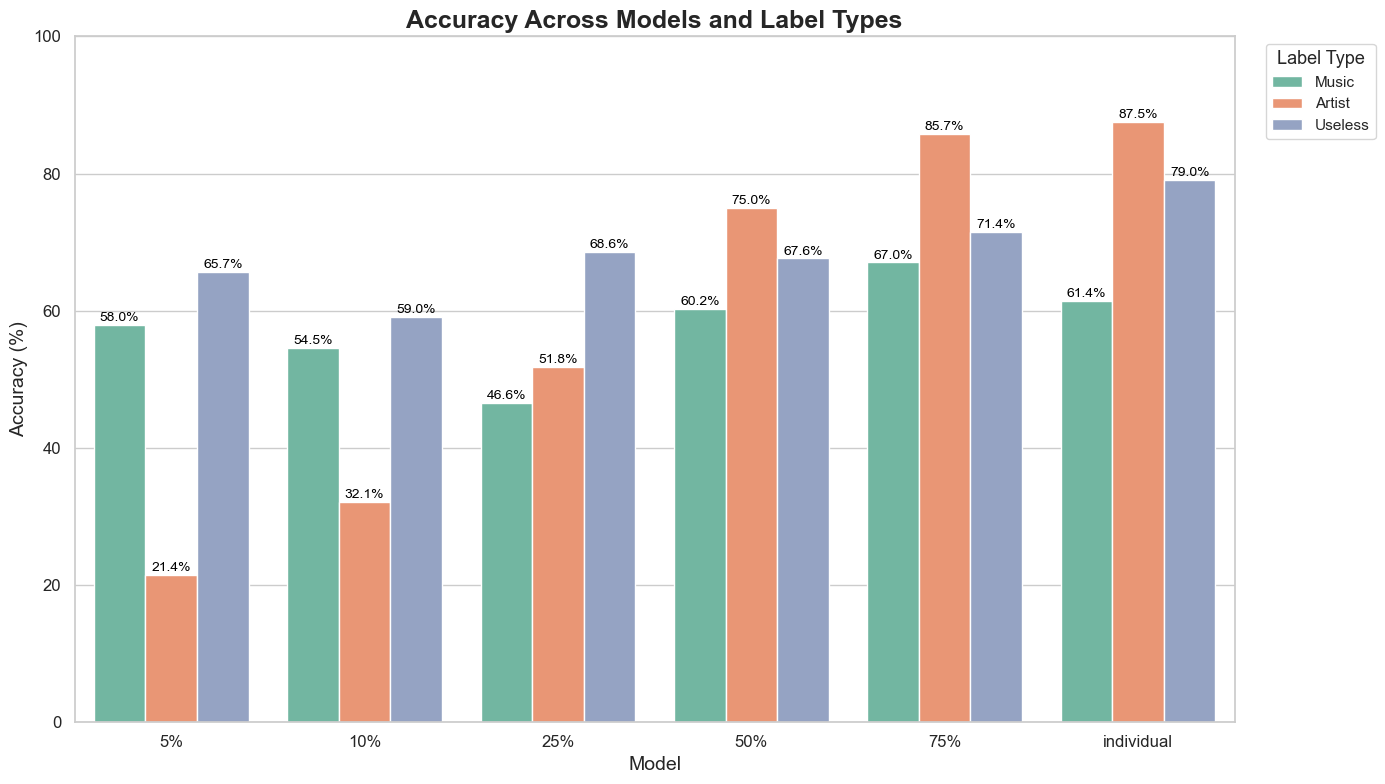

In [75]:
label_accuracy = pd.DataFrame()

for cluster in metrics_summary.index:
    for label in df['label'].unique():
        total_label = (df['label'] == label).sum()
        correct_label = ((df[cluster] == df['label']) & (df['label'] == label)).sum()
        accuracy = (correct_label / total_label) * 100 if total_label > 0 else 0
        label_accuracy.loc[cluster, label] = accuracy

label_accuracy_melted = label_accuracy.reset_index().melt(id_vars='index', var_name='Label Type', value_name='Accuracy')
label_accuracy_melted = label_accuracy_melted.dropna(subset=['Accuracy'])
label_accuracy_melted['Label Type'].replace({'useless': 'Useless'}, inplace=True)
custom_palette = {
    'Music': '#66C2A5', 
    'Artist': '#FC8D62',  
    'Useless': '#8DA0CB'  
}

plt.figure(figsize=(14, 8))
ax = sns.barplot(data=label_accuracy_melted, x='index', y='Accuracy', hue='Label Type', palette=custom_palette)

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:  
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2, height + 1), 
                    ha='center', va='center', fontsize=10, color='black')

# Enhancing the visuals
plt.title('Accuracy Across Models and Label Types', fontsize=18, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100) 
plt.legend(title="Label Type", title_fontsize='13', fontsize='11', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


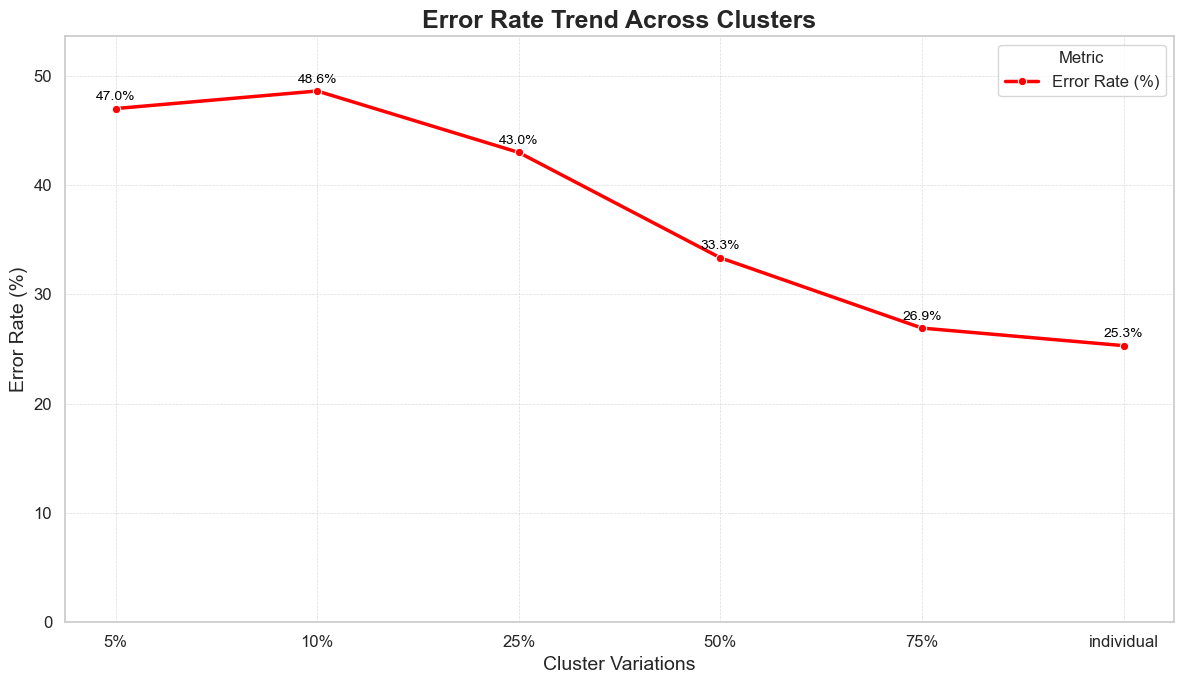

In [60]:
error_rates = {}

for cluster in metrics_summary.index:
    correct = (df[cluster] == df['label']).sum()
    total = len(df)
    error_rate = ((total - correct) / total) * 100 
    error_rates[cluster] = error_rate

error_df = pd.DataFrame.from_dict(error_rates, orient='index', columns=['Error Rate (%)'])
plt.figure(figsize=(12, 7))
sns.lineplot(x=error_df.index, y=error_df['Error Rate (%)'], marker='o', linewidth=2.5, color='red', label='Error Rate (%)')
for i, value in enumerate(error_df['Error Rate (%)']):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# Enhance visuals
plt.title('Error Rate Trend Across Clusters', fontsize=18, fontweight='bold')
plt.ylabel('Error Rate (%)', fontsize=14)
plt.xlabel('Cluster Variations', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, error_df['Error Rate (%)'].max() + 5) 
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)  
plt.legend(loc='upper right', fontsize=12, title="Metric", title_fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()



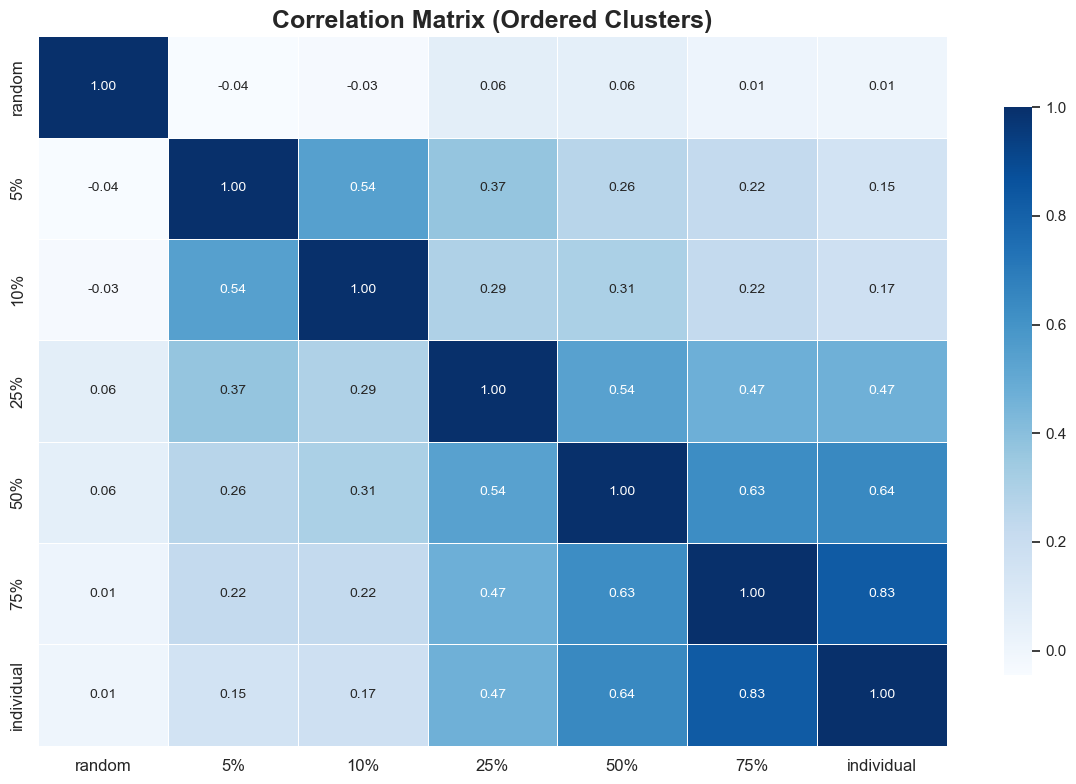

In [85]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['label'])
encoded_dataframe = df.copy()
for column in cluster_columns:
    encoded_dataframe[column] = label_encoder.transform(df[column])
ordered_cluster_columns = ['random', '5%', '10%', '25%', '50%', '75%', 'individual']
encoded_correlation_matrix = encoded_dataframe[ordered_cluster_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(encoded_correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5, annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix (Ordered Clusters)', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



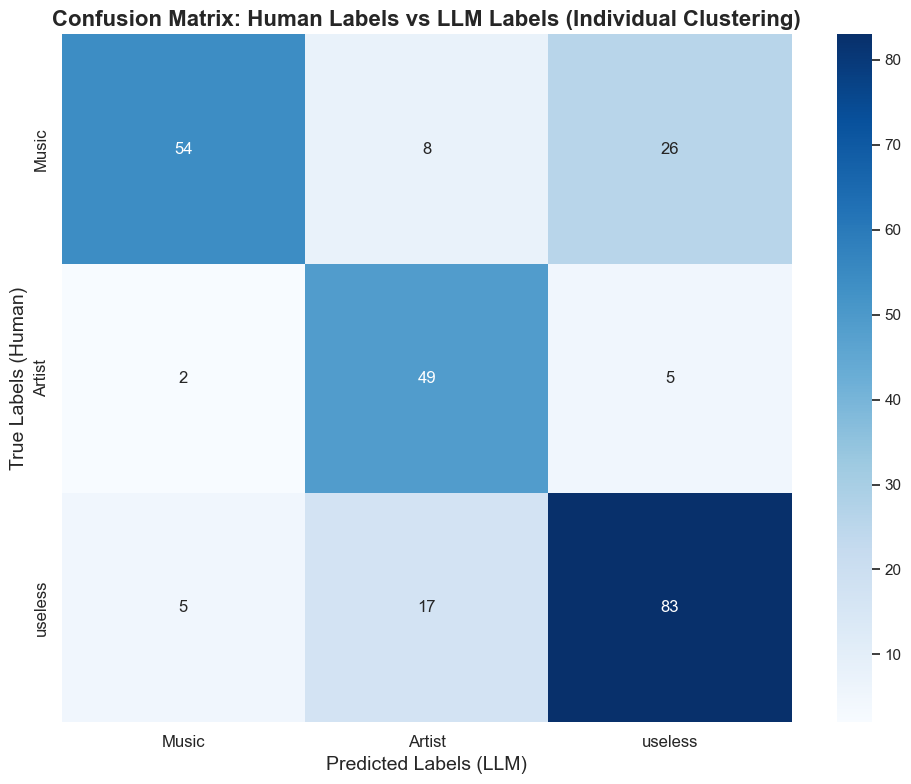

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(df['label'], df['individual'], labels=df['label'].unique())
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Confusion Matrix: Human Labels vs LLM Labels (Individual Clustering)', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Labels (LLM)', fontsize=14)
plt.ylabel('True Labels (Human)', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
